## Notebook for plotting generated EDGB Strain data

In [2]:
# imports
from matplotlib import rc
import h5py
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import json
from Generate_dCS_Strain import *
from scipy.signal import argrelextrema
rc('text', usetex=True)
from scipy.optimize import fmin

# Plot parameters
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3


In [3]:
## Auxiliary functions

def CutTimes(time, data, TLow, TUp): 
    """ Cut time and data to be between 
        TLow and TUp  """
    TLowIndex = np.where(time >= TLow)[0][0]
    TUpIndex = np.where(time <= TUp)[0][-1]
    time = time[TLowIndex:TUpIndex]
    data = data[TLowIndex:TUpIndex]
    return time, data

def GetPeakTimeMode(time, data): 
    """ Grab the peak time of some data """
    t_peak = time[np.argmax(np.absolute(data))]
    return t_peak

def SubtractPeakTimeMode(time, data): 
    """ Subtract the peak time of some data """
    t_peak = GetPeakTimeMode(time, data)
    return time - t_peak

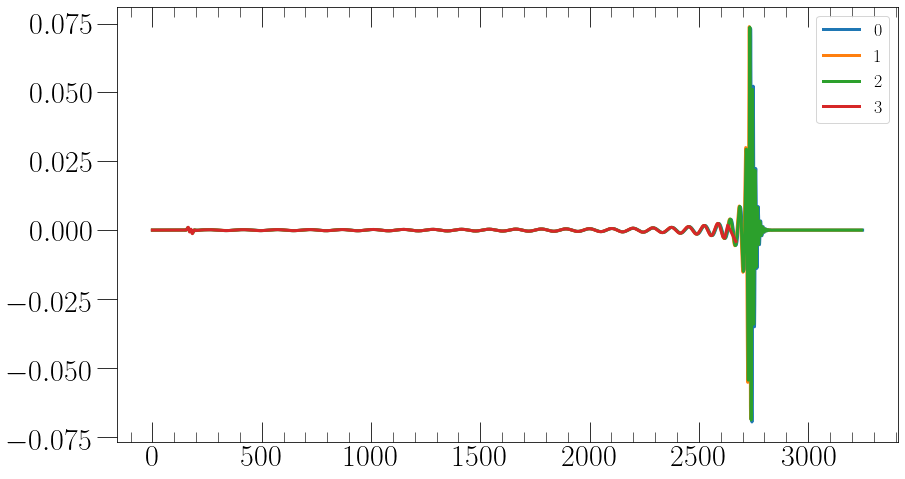

In [20]:
## Plot the strains from NR data
def PlotResolutionRuns():
    
    def GetPsi4Mode(p, radius=0, mode=(2,2)): 
        ## which finite radius should we use?
        l = mode[0]
        m = mode[1]
        psi4_file = p + '/rPsi4_FiniteRadii_CodeUnits.h5' 
        f = h5py.File(psi4_file, 'r')
        radius = sorted(f.keys())[radius]
        data = f[radius]['Y_l' + str(l) + '_m'  + str(m) + '.dat']
        time, re, im = data[:,0], data[:,1], data[:,2]
        Psi4 = re + 1j*im
        return time, Psi4
    
    def GetData(lev):
        p = "/Users/mokounkova/dCS_LIGO_Data/BBH_SKS_2100/Lev" + str(lev)
        time, result = GetPsi4Mode(p)
        plt.plot(time, result, label=lev)

    f, ax = plt.subplots(1, figsize=(14,8))

    for lev in [0,1,2,3]:
        GetData(lev)

    #plt.xlim(2500, 3000)
    plt.legend()
    plt.show()     

PlotResolutionRuns()